Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов (описание данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score

Разделяем данные на признаки и классы

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header =None)
grade = data[0]
attribute = data.loc[:, 1:]

Создаем генератор разбиения,задающий набор на обучение и валидацию

In [4]:
kf =KFold(len(attribute), shuffle=True, random_state=42)

Решаем задачу для трех метрик:евклидова,манхеттенская,чебышева

In [5]:
mean_scores = [[],[],[]]
metric_names = ['euclidean','manhattan','chebyshev'] 

Производим кросс-валидацию по блокам.Вычисляем качество на всех разбиениях,используя долю ответов в качестве меры качества.

In [6]:
for i in range(3):
    for k in range(1,100):
        knn = KNeighborsClassifier(n_neighbors=k,metric=metric_names[i])
        scores = cross_val_score(knn, attribute, grade, cv=kf, scoring='accuracy')
        mean_scores[i].append(1-scores.mean())

Строим график,по которому видно что минимум для всех метрик достигается при k ~ 1

<function matplotlib.pyplot.show>

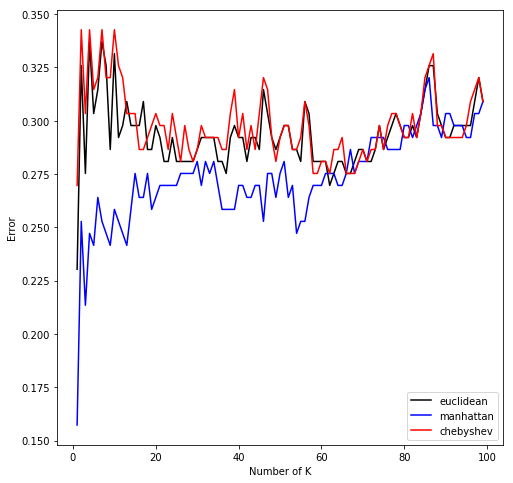

In [7]:
colors = ['black', 'blue', 'red']
plt.figure(figsize=(8, 8))
for i in range(3):
    plt.plot(range(1,100), mean_scores[i],color=colors[i],label=metric_names[i])
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.legend(loc='lower right')
plt.show